# September 16, 2020

## Creating a heatmap with cartopy and matplotlib

### Projecting an array of noise onto a globe as a heatmap

Before plotting actual data, I want to learn how an array gets projected onto a globe using cartopy and pcolormesh from matplotlib. How to the dimensions of the matrix and coordinate mesh overlap? I'll need to read the documentation and experiment a bit, but I know my data will ultimately take the place of one value per 1-degree x 1-degree quadrilateral on the Earth's surface. This correlates to 360 cells across, from the cell spanning 180W to 179W to the cell spanning 179E to 180E.

This becomes easier to see when we consider how we've chosen to represent coordinates numerically in our data; if we look just at the longitudes bounding the Western side of each cell, we have cells beginning at -180 to cells beginning at 179. The cell whose Western side is marked by 180 is the same as the cell whose Western side is marked by 180 (that is, the cell immediately to the east of the 180 meridian/International Date Line). So, while there are 361 numerical values, only 360 cells.

The same logic applies to latitude; our values range from -90 to 90, but we have only 180 cells as opposed to 181 because while the Southernmost cells are bounded to the South by -90, 90 represents the North Pole and there are no cells bounded by it to the South.

Therefore, to simulate projecting these 1-degree x 1-degree boxes onto a map, we can create an array of noise 180 rows by 360 columns.

The issue that remains is that the indices of the array will be labeled 0:359 and 0:179, but the geographic coordinates are labeled as -180:179 and -90:89. So, we'll have to adjust all the values when mapping to ensure that they align appropriately. I'll experiment with this, too.

In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# What dimensions for matrix? Going to start with 180 (vertical?) by 360 (horizontal?) for 1-degre x 1-degree 
# rectangles. Fill with randoms from 0 to 10... and try plotting it on a map.
frequency_array = np.random.normal(5,3,size=(180,360))

# To make sure that the array is being projected onto the map correctly, we'll set the first and last column
# to 0. This should make them easily visible, and we should expect them to be on either side of the
# 180 meridian.
for x in range(0, 180):
    frequency_array[x][359] = 0
    frequency_array[x][0] = 0

In reading the documentation for `matplotlib.pyplot.pcolormesh()` we see that the dimensions for the meshgrid should be one larger than the array to be mapped if our intention is to use flat shading (it is, as we want our color map to be accurate to the values in the array), which makes sense as these dimensions correspond to the corners of the quadrilaterals. So, we will create a meshgrid with dimensions 361 x 181.

We'll also set the appropraite projection, draw the world map, and then plot the array of random data as a colormap.

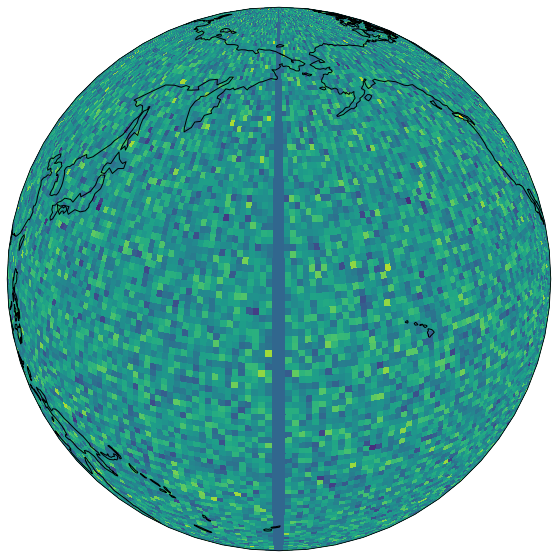

In [2]:
projection = ccrs.NearsidePerspective(central_longitude = -180, central_latitude = 30,  satellite_height = 10000000)
# Dimensions one larger than our data array.
lon = np.linspace(-180, 180, 361)
lat = np.linspace(-90, 90, 181)
Lon, Lat = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection = projection)
ax.set_global()
ax.coastlines()
ax.pcolormesh(Lon, Lat, frequency_array, transform = ccrs.PlateCarree())

After experimenting with it and deciding on the sizes described above, it seems our result is appropriate and we see what we were expecting. Using this basis, we can proceed with plotting the actual data as a heatmap.